<img src = "https://drive.google.com/uc?export=view&id=1XN22c7U27IGl71aGFywSHAuEfjH-PAam" alt = "Encabezado MLDS" width = "100%">  </img>

#**Tarea 4 : Visualización de datos con *Python***
---

Esta es una tarea para practicar las habilidades adquiridas usando *Matplotlib* y *Seaborn* en la construcción de visualizaciones de información. Utilizaremos el *dataset* de pasajeros del ***Titanic***, uno de los *dataset* más populares en el área de la ciencia de datos, disponible en plataformas como [Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv). Este conjunto de datos está disponible en la librería *Seaborn*.

El conjunto de datos cuenta con información personal de los pasajeros del *Titanic* y datos acerca de su supervivencia en el trágico evento:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| survived \| alive | 	Sobreviviente  | 	[0\|no] = No, [1\|yes] = Sí |
| pclass \| class	| Clase del tiquete | 	1 = [1\|First], 2 = [2\|Second], 3 = [3\|Third]
| sex 	| Sexo 	| 'male', 'female' |
| Age |	Edad en años 	| |
| sibsp |	# de hermanos / cónyuge abordo del Titanic 	| |
| parch |	# de padres / hijos abordo del Titanic 	| |
| fare 	| Costo del ticket | |	
| embarked |	Puerto de embarque |	C = Cherbourg, Q = Queenstown, S = Southampton |
| who |	Si es hombre, mujer o niño. | 'man', 'woman', 'child'  |	
| adult_male 	| Si es un hombre mayor de edad. | True, False	|
| deck |	Identificación de la cubierta/cabina.| 'A', 'B', 'C', 'D', 'E', 'F', 'G' |
| alone |	Si había embarcado solo.| True, False |



En esta tarea usted deberá recrear algunas visualizaciones de ejemplo usando *Python* y sus librerías de visualización presentadas esta semana. Recuerde almacenar en una variable el objeto retornado por la función para la correcta calificación.

> **Nota:** Esta tarea va a ser calificada en la plataforma **[UNCode](https://juezun.github.io/)**. Para esto, en cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas. Al finalizar, para realizar el envío (*submission*), descargue el notebook como un archivo **`.ipynb`** y haga su entrega a través de **Moodle**.

Ejecute la siguiente celda para importar las librerías.

In [207]:
#Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 110    

In [208]:
#TEST_CELL
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.7.12
Pandas 1.1.5
NumPy 1.19.5
Matplotlib 3.2.2
Seaborn 0.11.2


Este material fue realizado con las siguientes versiones:

- Python 3.7.10
- Pandas: 1.1.5
- NumPy: 1.19.5
- Matplotlib: 3.2.2
- Seaborn: 0.11.1

> **Nota:** Recuerde usar los alias y convenciones de la celda anterior en su código. UNCode no tendrá en cuenta librerías que importe en otras celdas y podrían afectar el tiempo de ejecución de los problemas. Estos son:
  *  **Pandas**: **`pd`**
  *  **NumPy**: **`np`**
  *  **Matplotlib Pyplot**: **`plt`**
  *  **Seaborn**: **`sns`**



## **0.  Leer el archivo de datos**
---
En esta ocasión importaremos el archivo de datos aprovechando la utilidad de carga de conjuntos de datos comunes de *Seaborn*.

In [209]:
# Creando los datos  (EJECUTE ESTA CELDA SIN MODIFICARLA)
titanic = sns.load_dataset('titanic', data_home='./')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [210]:
#TEST_CELL
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


En los siguientes ejercicios deberá replicar las figuras que se presentan a continuación usando las librerías mencionadas. No se preocupe por replicar exactamente los mismos colores, sino las figuras como tal. La mayoría de figuras se puede recrear usando solamente una o dos líneas de código. Preste especial atención a las etiquetas $x$ y $y$ de los ejes pues no se le brindará mucha más información. 

In [211]:
sns.set_style('whitegrid') #Se usará este estilo en los casos de ejemplo que utilicen Seaborn.

## **1. Correlación entre variables numéricas**
---

Inicialmente queremos conocer la correlación entre las variables numéricas del *dataset*. Para esto, no solamente calcularemos la matriz de correlación lineal entre cada una, sino que **graficaremos un mapa de calor** con el resultado.

En este ejercicio deberá recrear el mapa de calor presentado a continuación utilizando la librería *Seaborn*. 
> Para la imagen de referencia utilizamos el *colormap* **`coolwarm`**

Almacene el resultado de la función de visualización en la variable **`titanic_corr_matrix`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* Para este ejercicio deberá utilizar conceptos usados en las unidades anteriores. Primero es necesario calcular la matriz de correlación y después graficar el mapa de calor.
* Ponga especial atención a los detalles. Teniendo en cuenta que los valores de los coeficientes de correlación están en el rango $-1.0$ a $1.0$, fijaremos estos valores como el mínimo (`vmin`) y máximo (`vmax`) en el mapa de calor, respectivamente.
* Tenga presente la documentación de las funciones de visualización. Según la función que utilice, los argumentos a utilizar para definir los parámetros podrían variar.
* Deberá agregar el título de la gráfica por su cuenta. Para esto, utilice métodos de objetos **`Axes`** de *Matplotlib* como **`set_title`** sobre el objeto **`titanic_corr_matrix`**.

* La cadena de texto exacta usada en este ejercicio es:
  * **Título**: `'Correlation heatmap'`

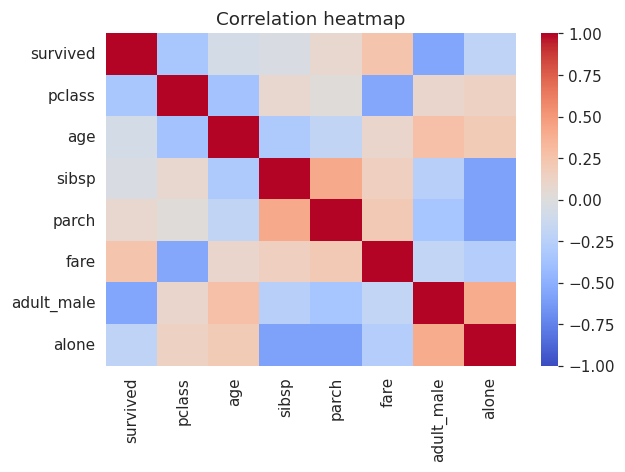

In [212]:
## VARIABLE CALIFICADA: titanic_corr_matrix
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1-2 líneas de código)

titanic_corr_matrix = sns.heatmap(titanic.corr(), cmap='coolwarm', vmin=-1, vmax=1)
titanic_corr_matrix.set_title("Correlation heatmap")


### FIN DEL CÓDIGO ###

titanic_corr_matrix

**Salida esperada:**
 

 ```
<matplotlib.axes._subplots.AxesSubplot at 0x____________>
```
![corr matrix](https://drive.google.com/uc?export=view&id=1MvaC9DfubQcRZhmz9GOENgou55_YGAwk)

In [213]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_corr_matrix.get_figure().show()
plt.close()

## **2. Tarifa del tiquete**
---

Vamos a explorar las tarifas pagadas por los pasajeros en el embarque del *Titanic*.  Algunas de las personas embarcadas hacían parte de la tripulación. 
¿Cuál fue el valor de su tarifa? ¿Los precios estaban claramente distribuidos por clases?


### **2.1. Distribución de la tarifa**
---

Primero deberá representar gráficamente la distribución de la tarifa del tiquete de ingreso de los pasajeros a bordo del *Titanic* por medio de un **histograma**. 

> * Para la imagen de referencia utilizamos el color naranja (**`orange`**).
* Para este ejercicio deberá utilizar $10$ intervalos de clase (**`bins`**).

Almacene el resultado de la función de visualización en la variable **`titanic_dist_tarifa`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* Deberá seleccionar los datos de la tarifa (**`fare`**) y después representar su distribución por medio de un histograma usando *Seaborn* o *Matplotlib*.
* Tenga presente la documentación de las funciones de visualización. 
* En este ejercicio **SÍ** se evaluará el color de la figura. Utilice el nombre del color **`orange`**.
* Deberá agregar el título y etiquetas de los ejes por su cuenta. Para esto, utilice métodos de objetos **`Axes`** de *Matplotlib* como **`set_title`** y **`set_xlabel`** sobre el objeto **`titanic_dist_tarifa`**.
* Las cadenas de texto exactas usadas en este ejercicio son:
  * **Título**: `'Fare distribution'`
  * **Etiqueta del eje X**: `'Fare'`
  * **Etiqueta del eje Y**: `'Passenger count'`


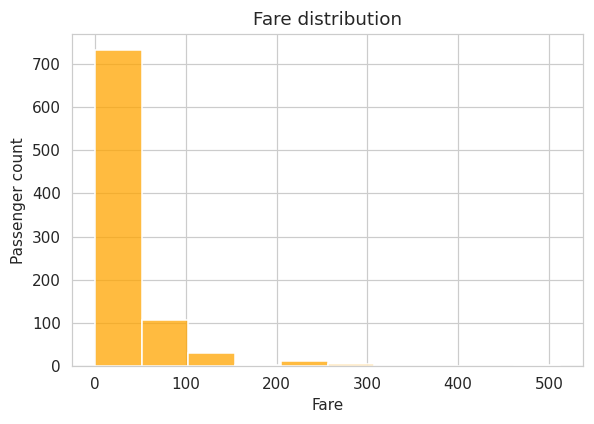

In [214]:
## VARIABLE CALIFICADA: titanic_dist_tarifa
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)
titanic_dist_tarifa = sns.histplot(
    titanic['fare'],  bins = 10, color = 'orange' )
titanic_dist_tarifa.set_title("Fare distribution")
titanic_dist_tarifa.set_xlabel("Fare")
titanic_dist_tarifa.set_ylabel("Passenger count");
### FIN DEL CÓDIGO ###

titanic_dist_tarifa

**Salida esperada:**

```
<matplotlib.axes._subplots.AxesSubplot at 0x____________>
```
 
![fare_hist](https://drive.google.com/uc?export=view&id=1qR7KUCaesnWXIewc1WX5RkU3w_f2j_nb)

In [215]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_dist_tarifa.get_figure().show()
plt.close()

### **2.2. Tarifa del tiquete y edad**
---

En muchas ocasiones las tarifas están claramente diferenciadas entre niños, adultos, y adultos mayores. ¿Era éste el caso del transatlántico?

En esta tarea deberá representar gráficamente la relación entre la tarifa del tiquete de ingreso y la edad de los pasajeros a bordo del *Titanic* como se presenta a continuación. 

> Esta vez no se personalizaron los estilos de la gráfica con la ayuda de sus argumentos.

Almacene el resultado de la función de visualización en la variable **`titanic_edad_tarifa`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* Construya el gráfico de distribuciones conjuntas de *Seaborn* para explorar la relación entre las edades (**`age`**) de los pasajeros y sus tarifas (**`fare`**). 
* Para este ejercicio no debe hacer ninguna modificación especial. Es suficiente con identificar la función de visualización apropiada y usar los argumentos de datos correctos.


</p>

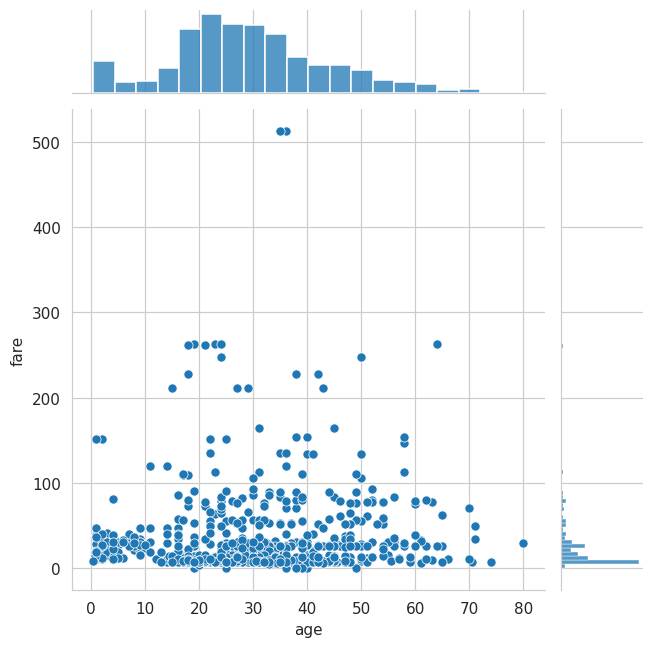

In [216]:
## VARIABLE CALIFICADA: titanic_edad_tarifa
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)
titanic_edad_tarifa = sns.jointplot(x ='age',
              y ='fare',
              data = titanic
              );
### FIN DEL CÓDIGO ###

titanic_edad_tarifa

**Salida esperada:**

```
<seaborn.axisgrid.JointGrid at 0x____________>
```
 
![corr matrix](https://drive.google.com/uc?export=view&id=1FOeM2vLSlRSDLP5gU5mbi_LSInTzq8qh)

In [217]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_edad_tarifa.fig.show()
plt.close()

## **3. Hombres, mujeres y niños**
---

Ahora, exploraremos la distribución de los pasajeros y tripulación, distinguiendo por género y edad, y analizando la relación que estas variables tuvieron con su supervivencia.

### **3.1. Distribución de edad de mujeres y hombres**
---

Primero, exploraremos la distribución de edades para mujeres y hombres en dos gráficas.

En esta tarea deberá representar mediante dos **histogramas** la edad de los pasajeros en dos gráficas en la misma figura, usando para discriminar las distribuciones la variable categórica sexo (**`sex`**) como se muestra a continuación: 

> * Los diagramas son construidos como un **`FacetGrid`** de *Seaborn*.
* La paleta de color usada en el ejemplo es el *colormap* **`cool`**.

Almacene el resultado de la función de visualización en la variable **`titanic_sex_dist`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>
<p>

* La solución tiene que realizarse con **`FacetGrid`** de *Seaborn* junto con la función de visualización de *Matplotlib* para graficar histogramas. No utilice el método **`displot`** ni **`histplot`** en el proceso y utilice los *bins* por defecto.
* Para la imagen de referencia utilizamos el *colormap* **`cool`** como paleta de color. Este *colormap* se define al generar el **`FacetGrid`** vacío.
* Para este ejercicio, tanto el color como la columna son usados para diferenciar entre las dos categorías.
</p>

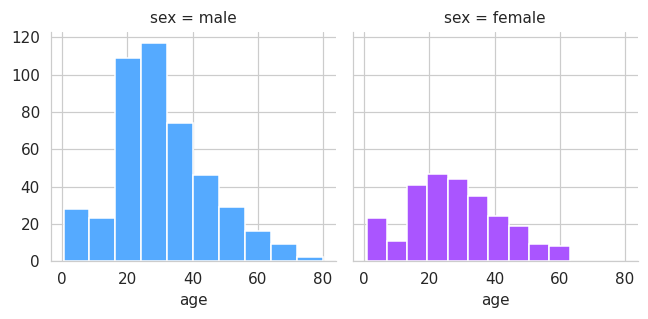

In [218]:
## VARIABLE CALIFICADA: titanic_sex_dist
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)
titanic_sex_dist = sns.FacetGrid(titanic, palette='cool', col="sex" , hue='sex' )
titanic_sex_dist = titanic_sex_dist.map(plt.hist, "age", )

### FIN DEL CÓDIGO ###

**Salida esperada:**

``` 
<seaborn.axisgrid.FacetGrid at 0x____________>
```

![gender hist](https://drive.google.com/uc?export=view&id=1jzc3m0I211QTeTpee7_o8vb2JSMg6zcZ)

In [219]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_sex_dist.fig.show()
plt.close()

### **3.2. Mujeres y niños primero**
---
Durante la emergencia, se siguió un protocolo de *\"mujeres y niños primero\"* para decidir las personas que iban a acceder a las naves de salvamento.

En esta tarea usted debe representar gráficamente la cantidad de hombres, mujeres y niños que sobrevivieron y fallecieron en la tragedia. Para esto realice una **gráfica de barras** con el conteo de valores para cada caso como se muestra a continuación: 

> Para la imagen de referencia utilizamos el *colormap*  **`plasma`** como paleta de color.

Almacene el resultado de la función de visualización en la variable **`titanic_mujeres_y_niños`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* Usa la función para graficar conteos de variables categóricas de *Seaborn*.
* Fíjese en los nombres de las variables que va a utilizar. Algunas columnas son muy similares pero el resultado obtenido no es el mismo. En este caso puede usar la variable **`who`** que determina si el pasajero es hombre, mujer o niño.
* Deberá agregar el título y etiquetas de los ejes por su cuenta. Para esto, utilice métodos de objetos **`Axes`** de *Matplotlib* como **`set_title`** y **`set_xlabel`** sobre el objeto **`titanic_mujeres_y_niños`**.
* Las cadenas de texto exactas usadas en este ejercicio son:
  * **Título**: `'Women and Children First'`
  * **Etiqueta del eje X**: `'Category (W, M, C)'`
  * **Etiqueta del eje Y**: `'Total of survivors'`

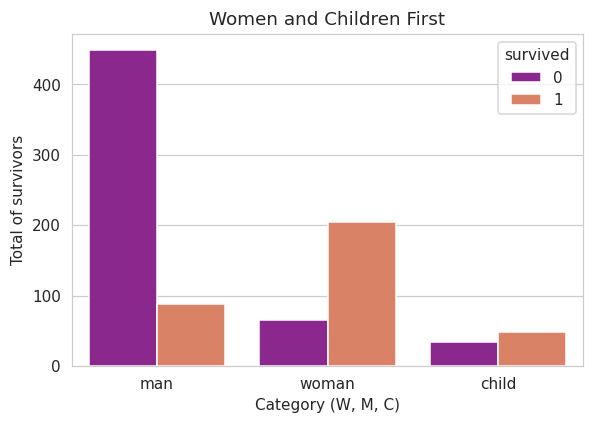

In [220]:
## VARIABLE CALIFICADA: titanic_mujeres_y_niños
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)

titanic_mujeres_y_niños = sns.countplot(x = 'who', hue='survived', data=titanic, palette='plasma');
titanic_mujeres_y_niños.set_title("Women and Children First")
titanic_mujeres_y_niños.set_xlabel("Category (W, M, C)")
titanic_mujeres_y_niños.set_ylabel("Total of survivors");

### FIN DEL CÓDIGO ###
titanic_mujeres_y_niños

**Salida esperada:**
 
``` 
<matplotlib.axes._subplots.AxesSubplot at 0x____________>
```

![women and children](https://drive.google.com/uc?export=view&id=112uC0gwNZw_bRL5WtzqbRgQA-SOnqOOn)

In [221]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_mujeres_y_niños.get_figure().show()
plt.close()

## **4. Primera, segunda y tercera clase**
---

En el momento de la tragedia, la evacuación se realizó dando prioridad con respecto a la clase de los pasajeros. Vamos a explorar la distribución de personas, por edad, que correspondían a cada clase para conocer cómo influyó esto en su supervivencia.

### **4.1. Usando diagramas de cajas**
---

En este ejercicio deberá representar gráficamente la distribución y medidas de posición de las edades de los pasajeros a bordo del *Titanic* en cada clase utilizando una **diagramas de cajas** como se presenta a continuación: 

> Para la imagen de referencia utilizamos el *colormap* **`afmhot`** como paleta de color.

Almacene el resultado de la función de visualización en la variable **`titanic_clase_cajas`**. 

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>


* Al construir el diagrama de cajas puede seleccionar una variable categórica en el eje *x* para conocer las distribuciones de cada grupo independientemente.
* Fíjese en los nombres de las variables que va a utilizar. Algunas columnas son muy similares pero el resultado obtenido no es el mismo.
* Deberá agregar el título y etiquetas de los ejes por su cuenta. Para esto, utilice métodos de objetos **`Axes`** de *Matplotlib* como **`set_title`** y **`set_xlabel`** sobre el objeto **`titanic_clase_cajas`**.
* Las cadenas de texto exactas usadas en este ejercicio son:
  * **Título**: `'Age distribution by class'`
  * **Etiqueta del eje X**: `'Passenger travel class (I, II, III)'`
  * **Etiqueta del eje Y**: `'Age (years)'`





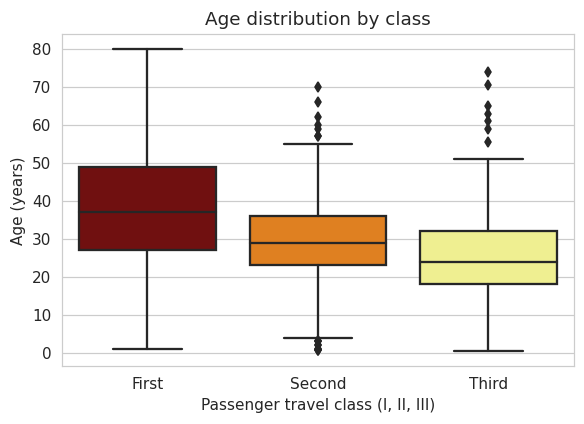

In [222]:
## VARIABLE CALIFICADA: titanic_clase_cajas
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)
#titanic_clase_cajas = sns.catplot(x='pclass', y='age',data=titanic, kind='box', hue='pclass', palette='afmhot', legend=False)

fig1, titanic_clase_cajas = plt.subplots()

titanic_clase_cajas = sns.boxplot(x='class',y='age',data=titanic, palette= 'afmhot')
titanic_clase_cajas.set_title("Age distribution by class")
titanic_clase_cajas.set_xlabel("Passenger travel class (I, II, III)")
titanic_clase_cajas.set_ylabel("Age (years)")
### FIN DEL CÓDIGO ###

titanic_clase_cajas

**Salida esperada:**

``` 
<matplotlib.axes._subplots.AxesSubplot at 0x____________>
```

![corr matrix](https://drive.google.com/uc?export=view&id=1dabmMGhnEldhINwGibRqbW65LJWufOpA)

In [223]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_clase_cajas.get_figure().show()
plt.close()

### **4.2. Usando gráficas de enjambre**
---

En este ejercicio deberá representar gráficamente la distribución de las edades de los pasajeros a bordo del *Titanic* en cada clase utilizando una **gráfica de enjambre o *swarm plot***, además, deberá diferenciar entre los que sobrevivieron y los que no, así:

> * La paleta de colores usada para la imagen de referencia es **`Set1`**. 
* El radio de los puntos es de $2$ unidades.


Almacene el resultado de la función de visualización en la variable **`titanic_clase_swarm`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pistas</b></font>
</summary>

* Use la función **`swarmplot`** de *Seaborn* para generar el diagrama de enjambre.
* En esta gráfica las dos categorías (sobrevivientes / no sobrevivientes) deben estar bien diferenciadas entre sí. Use el parámetro **`dodge`** para conseguirlo.
* Si el anterior punto es correcto, debería usar los mismos nombres de variables.
* Configure el tono del color de acuerdo al valor de la variable categórica **`survived`**.
* Deberá agregar el título y etiquetas de los ejes por su cuenta. Para esto, utilice métodos de objetos **`Axes`** de *Matplotlib* como **`set_title`** y **`set_xlabel`** sobre el objeto **`titanic_clase_swarm`**.
* Las cadenas de texto exactas usadas en este ejercicio son:
  * **Título**: `'Age distribution by class'`
  * **Etiqueta del eje X**: `'Passenger travel class (I, II, III)'`
  * **Etiqueta del eje Y**: `'Age (years)'`


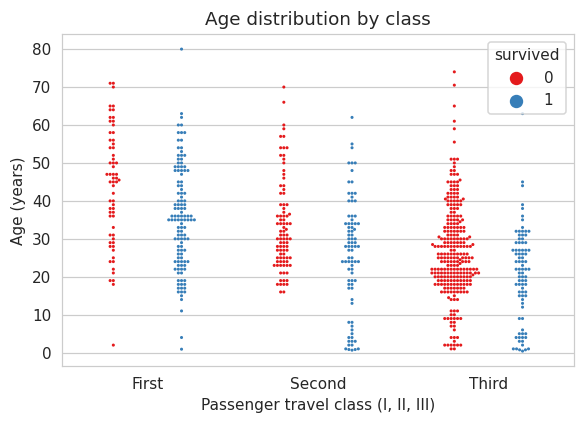

In [233]:
## VARIABLE CALIFICADA: titanic_clase_swarm
### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)
#titanic_clase_swarm = sns.catplot(x='pclass', y='age', hue = 'survived',data=titanic, kind='swarm', dodge = True, palette='Set1');
titanic_clase_swarm  = sns.swarmplot(x='class', y='age', hue = 'survived', data=titanic, dodge = True, palette='Set1', size = 2  );
titanic_clase_swarm.set_title("Age distribution by class")
titanic_clase_swarm.set_xlabel("Passenger travel class (I, II, III)")
titanic_clase_swarm.set_ylabel("Age (years)");

### FIN DEL CÓDIGO ###

titanic_clase_swarm

**Salida esperada:**

``` 
<matplotlib.axes._subplots.AxesSubplot at 0x____________>
```

![swarm class](https://drive.google.com/uc?export=view&id=1f63pcf5SeSb-RvyIr8HKLvxiJlH02IqX)

In [225]:
# NO ELIMINAR - NECESARIO PARA LA CORRECTA CALIFICACIÓN
titanic_clase_swarm.get_figure().show()
plt.close()

**¡Felicitaciones!** Ha terminado la tarea de la Unidad 4. ¡Buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Ingrese a Moodle.
3. Realice el envío del *notebook* que descargó en la tarea (o quiz) correspondiente.
4. Recuerde que si tiene algún error, puede hacer múltiples intentos de envío en UNCode. 

## **Créditos**
---

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
  - Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*
